In [1]:
%matplotlib inline
import math  # 標準のmathモジュール

import numpy as np  # NumPy
import pandas as pd  # Pandas

from matplotlib import pylab as plt  # Matplotlib

# matplotlibで日本語表示する為の指定
import japanize_matplotlib

Text(0.5, 1.0, 'グラフ1 : ポアソン分布')

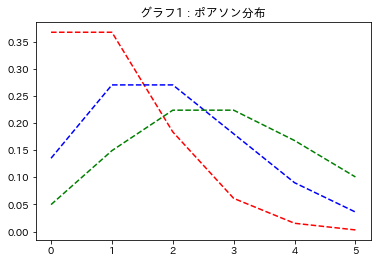

In [2]:
# グラフ生成関数
from scipy.stats import poisson

dists = list()

for avg in range(1, 4):
    dists.append([poisson.pmf(k, avg) for k in range(0, 6)])

plt.plot(dists[0], 'r--', dists[1], 'b--', dists[2], 'g--')
plt.title('グラフ1 : ポアソン分布')

In [3]:
df = pd.read_csv('../../9_data/サッカー/Jリーグスコア.csv')
df.head()

,ホーム,アウェイ,ホームスコア,アウェイスコア
0,清水エスパルス,コンサドーレ札幌,0,2
1,アルビレックス新潟,ヴァンフォーレ甲府,1,0
2,ヴィッセル神戸,サンフレッチェ広島,1,2
3,サガン鳥栖,FC東京,2,1
4,ベガルタ仙台,大宮アルディージャ,3,0


In [4]:
# 全試合のスコアをリストにまとめる
scores = df['ホームスコア'].append(df['アウェイスコア'])

# 平均を取る
scores_avg = scores.mean()

scores_avg

1.3107638888888888

In [5]:
def poisson_pmf(k):
    """
    ポアソン分布
    :param k: k
    :return: ポアソン分布
    """
    # 式aの分子の部分
    n = (scores_avg ** k) * (math.e ** -scores_avg)

    # 式aの分母の部分
    d = math.factorial(k)

    # 分子/分母
    return n / d

In [6]:
data = list()

# 0〜7まで結果を表示
for k in range(8):
    data.append([poisson_pmf(k) * 100, (scores == k).sum() / len(scores) * 100])

pd.DataFrame(data, columns=['関数', '実績'])

,関数,実績
0,26.961402,26.909722
1,35.340032,35.763889
2,23.161219,22.569444
3,10.119630,10.763889
4,3.316111,2.777778
5,0.869328,0.694444
6,0.189914,0.347222
7,0.035562,0.173611


In [7]:
ind = [9, 10, 50, 100]
data = list()

# 9点、10点, 50点、100点の確率
for k in ind:
    data.append([poisson_pmf(k) * 100, (scores == k).sum() / len(scores) * 100])

pd.DataFrame(data, index=ind, columns=['関数', '実績'])

,関数,実績
9,8.485934e-04,0.0
10,1.112306e-04,0.0
50,6.666395e-58,0.0
100,1.633750e-145,0.0


In [8]:
# Jリーグでの0点の確率
from scipy.stats import poisson

k = 0
poisson.pmf(k, 1.31)

0.2698200563846868

In [9]:
df = pd.read_csv('../../9_data/プロ野球/2017プロ野球スコア.csv')
df.head()

,date,time,home_team,visitor_team,home_score,visitor_score,stadium
0,20170331,1800,巨人,中日,6,2,東京ドーム
1,20170331,1800,ヤクルト,DeNA,9,2,神 宮
2,20170331,1800,広島,阪神,6,10,マツダスタジアム
3,20170331,1830,日本ハム,西武,1,8,札幌ドーム
4,20170331,1830,オリックス,楽天,4,6,京セラD大阪


In [10]:
# 正解例

df = pd.read_csv('../../9_data/プロ野球/2017プロ野球スコア.csv')
baseball_scores = df['home_score'].append(df['visitor_score'])
lambd = baseball_scores.mean()


def poisson_pmf(k):
    """
    ポアソン分布
    :param k: k
    :return: ポアソン分布
    """
    # 式aの分子の部分
    n = (lambd ** k) * (math.e ** (-1 * lambd))

    # 式aの分母の部分
    d = math.factorial(k)

    # 分子/分母
    return n / d


data = list()

# 0〜10まで結果を表示
for k in range(11):
    data.append([poisson_pmf(k) * 100, (baseball_scores == k).sum() / len(baseball_scores) * 100])

pd.DataFrame(data, columns=['関数', '実績'])

,関数,実績
0,1.858760,8.163265
1,7.407642,13.492063
2,14.760692,14.682540
3,19.608403,14.229025
4,19.536150,13.095238
5,15.571330,9.920635
6,10.342635,8.163265
7,5.888300,5.725624
8,2.933301,4.591837
9,1.298886,2.721088
